<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/FeedForwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#librairy:
import pandas as pd # used to manipulate the data 
import numpy as np
import scipy as sp 
from numpy import *

In [20]:
#loading the data in a dataframe

data = pd.read_csv('data_ffnn_3classes.txt', sep=" ", header=None)

In [21]:
data.columns = ['feature1','feature2','target']
data.head(10)

,feature1,feature2,target
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0
5,4.0150,3.1937,1.0
6,3.3814,3.4291,1.0
7,3.9113,4.1761,1.0
8,2.7822,4.0431,1.0
9,2.5518,4.6162,1.0


In [22]:
#variable definition: first we will take the exercice values then we will generalize our function once it is working

##############################
#
#N = number of feature = 2
N = 2
#
#I = data size = 71
I = 71
#
#J = output dimension = 3
J = 3
#
#K = number of hidden neuron = how many we want
K =5

#############################
#target matrix: data['target'] is actually our target matrix
#in order to compute the SSE with our estimation we have to transform it into an array of the same shape
#In order to do that we will use dummy variable and more precisely the get_dummies from pandas librairy

y = pd.get_dummies(data['target']).to_numpy()

#############################
#feature matrix:
X = data[['feature1','feature2']].to_numpy()

#############################
# W and V matrix: we will initialize them to random value between 0 and 1 time 0.1 
# i have read that it is useful to multiply them by a small coefficient, so we will start with that.
# it seem they are some kind of neurons so their dimension has to be number of feature + 1 (for the bias) x K
# with K being the number of hidden neuron i want
# We will set it to 5 as of now
V = np.random.rand(N+1,K) 

W = np.random.rand(K+1,J) 

In [23]:
#forward propagation function:
def forwardprop(X,N,I,J,K,W,V):

####################################
#bias matrix
#dimension I*1
  B = np.ones(((X.T).shape[1],1))

#############################
# X completed with the bias
# dimension: I*N+1
  X_b = np.concatenate((B,X),axis = 1)

#############################
# X_b  computed with the hidden neurons = X_bv
# dimension I*K
  X_bv = np.matmul(X_b,V)

#############################
# define sigmoid of X_bv 
# dimension : I*K
  F = 1 / (1 + exp(-X_bv))

#############################
# complete our F with new bias which is still equal to one in our project
#dimension :
  F_b = np.concatenate((B,F),axis = 1)

#############################
# F_b computed with the hidden weight W
# dimension : I*J
  F_bw = np.matmul(F_b,W)

  #X I*N #B I*1 #X_b I*N+1 #X_bv I*K #F_b I*K+1 #F_bv I*J #G I*J
############################
# G after F_bw has been imputed to the sigmoid
# dimension : I*J
  G  = 1.0 / (1.0 + exp(-F_bw))

############################################
#backpropagation:
  return [X_b,F,F_b,G]

In [24]:
#Sum of square error SSE:
#found this method on SO
def SSE(A,B):
 # E = 0.5*(((A-B)).sum())**
  E = 1 / 2 * np.sum((A - B)**2)
  return E


In [25]:
#########################
#we can't compute our G with our label y yet as they don't have the same shape
#let's use dummy variable to create a new y

In [26]:
#backpropagation function:
def backprop(W,V,y,G,X_b,F,F_b,alpha1,alpha2):
  
  for k in range(K+1):
    for j in range(J):
      W[k][j] = W[k][j] - alpha1*((G[:,j]-y[:,j])*G[:,j]*(np.ones(G.shape)[:,j]-G[:,j])*F_b[:,k]).sum(axis =0)





#############################################w
  for k in range (K):
    for f in range(N+1):
      s=0
      for j in range(J):    
        s = s + ((G[:,j] - y[:,j]) * G[:,j] * (1-G[:,j])) * W[k+1,j] * F[:,k] * (1 - F[:,k]) * X_b[:,f]
      V[f,k]= V[f,k]- 0.1* np.sum(s)

  return [W,V]
#############################################

In [27]:
#FFNN function:

for i in range (5000):
  X_b,F,F_b,G = forwardprop(X,2,71,3,5,W,V)
  W,V = backprop(W,V,y,G,X_b,F,F_b,0.2,0.2)
  print(SSE(y,G))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
55.213340659193406
31.61820976115728
31.690395683019737
31.176679670429824
29.43708565766829
29.069846150383597
34.1583279303603
33.14930028049847
29.694024619512547
30.00028881811362
31.336046197804592
30.549624689072488
27.968774716287125
25.636177129791456
29.923024550377278
31.27495142363735
29.488263503470264
29.88413483309716
30.341482777762273
28.430306782600937
26.4674760793881
26.379190535767215
31.39269501660909
30.271687364474133
27.01997806190733
26.053791529126364
31.261235346001712
29.846333898095533
26.243236401694254
29.628004424084807
31.449932566977687
26.40874404000938
27.461326071173083
31.25734232999619
30.784168947120126
25.40054593078552
24.19494881779236
30.65958104460513
28.178169301646804
31.81047353864553
31.506586436762397
29.476461676900062
31.947443390447194
34.04107064657957
32.88415392452639
29.115051124668575
26.957849605364185
32.32248283526801
27.273662519754573
24.696742151

In [28]:
#data visualisation:
print("here is our estimation")
print(G)
print("here is the true data")
print(y)

here is our estimation
[[3.40485942e-03 9.96923193e-01 3.14491780e-03]
 [3.91516433e-03 9.96484118e-01 3.16843944e-03]
 [3.50545271e-03 9.96726974e-01 3.21662472e-03]
 [4.06512221e-03 9.96317019e-01 3.18097232e-03]
 [3.44329073e-02 9.24236402e-01 5.00792113e-03]
 [2.35076765e-03 9.95260427e-01 5.38098386e-03]
 [3.86184886e-03 9.96458558e-01 3.20641420e-03]
 [3.50028173e-03 9.96719707e-01 3.22205250e-03]
 [3.57854564e-03 9.96717922e-01 3.20216107e-03]
 [3.50325042e-03 9.96748734e-01 3.20697138e-03]
 [3.55372789e-03 9.96716568e-01 3.21020407e-03]
 [3.76730459e-02 9.61503806e-01 3.02002043e-03]
 [3.71019422e-03 9.96712465e-01 3.13225518e-03]
 [3.52220872e-03 9.96781078e-01 3.18672713e-03]
 [5.45541618e-03 9.95043534e-01 3.14563211e-03]
 [3.52118769e-03 9.96723125e-01 3.21499806e-03]
 [3.53633348e-03 9.96716278e-01 3.21629350e-03]
 [3.38448765e-03 9.96533575e-01 3.44319205e-03]
 [4.86729419e-03 9.94716978e-01 3.52700007e-03]
 [6.05825081e-03 9.94434033e-01 3.14602008e-03]
 [9.63509075e-01 

In [ ]:
#result:


[[ 0.73875896 -4.03058038  2.48750005 -1.60550742  1.23404161]
 [ 2.92674379  5.24251483 -0.18015731  1.57286932  1.18207048]] [[-8.43918615  8.67080327 -0.42355424]
 [ 6.24493598  1.77368932 -7.98618739]
 [-5.12133308  4.44855453  1.59757651]
 [-4.35770271  3.06186222  0.21759512]
 [ 0.59877056 -4.13745701  1.07445318]]
[[-11.32500976   2.2499708   -5.99564924  -4.63143932   0.92963633]] [[ 0.42578802 -4.50802833  1.72059993]]
[[0.04020778 0.9622902  0.00485506]]  ==  1
[[0.17004715 0.86689272 0.0060279 ]]  ==  1
[[0.00843972 0.99210921 0.01035567]]  ==  1
[[0.06036711 0.94526409 0.01141677]]  ==  1
[[0.20869471 0.67934315 0.03078775]]  ==  1
[[0.01471852 0.97493385 0.02933642]]  ==  1
[[0.02478183 0.97463893 0.01576586]]  ==  1
[[0.00269374 0.99721193 0.01662235]]  ==  1
[[0.02552114 0.97827762 0.00906552]]  ==  1
[[0.02183201 0.98069817 0.00699105]]  ==  1
[[0.00671326 0.9934161  0.0142954 ]]  ==  1
[[0.3047296  0.68753437 0.01547335]]  ==  1
[[0.15889453 0.87156417 0.00487389]]  ==

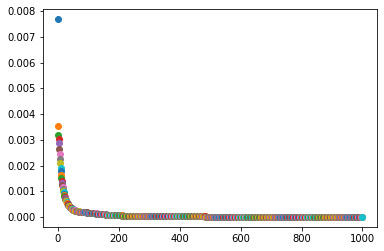

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

class NeuralNetwork:
  def __init__(self):
    """
      Learning rate (alpha), weights and biases for the neural network.
    """
    self.w1 = np.random.rand(2, 5)
    self.b1 = np.random.rand(1, 5)
    self.w2 = np.random.rand(5, 3)
    self.b2 = np.random.rand(1, 3)
    self.alpha = 0.1

  def evaluate(self, x):
    h = sigmoid(np.dot(x, self.w1) + self.b1)
    return sigmoid(np.dot(h, self.w2) + self.b2)

  def train(self, training_input, training_output, alpha, iterations, plt):
    for i in range(iterations):
      err = 0
      for x, y in zip(training_input, training_output):
        h1 = sigmoid(np.dot(x, self.w1) + self.b1)
        y_train = sigmoid(np.dot(h1, self.w2) + self.b2)
        j = 1 / 2 * np.sum((y - y_train)**2)
        delta_b2 = (y_train - y) * grad_sigmoid(np.dot(h1, self.w2) + self.b2)
        delta_w2 = np.dot(h1.T, delta_b2)
        delta_b1 = np.dot(delta_b2, self.w2.T * grad_sigmoid(np.dot(x, self.w1) + self.b1))
        delta_w1 = np.dot(x.T, delta_b1)
        self.w1 = self.w1 - delta_w1 * alpha
        self.b1 = self.b1 - delta_b1 * alpha
        self.b2 = self.b2 - delta_b2 * alpha
        self.w2 = self.w2 - delta_w2 * alpha
        err = err + j
        err = err / len(training_input)
      plt.scatter(i, err)
    print(self.w1, self.w2)
    print(self.b1, self.b2)

  def test(self, x1, x2):
    arr = np.array([x1, x2])
    return self.evaluate(arr)

def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x))

def grad_sigmoid(x):
	return sigmoid(x) * (1.0 - sigmoid(x))

def convert_to_int(x):
  if x[0][0] > 0.66:
    return 0
  if x[0][1] > 0.66:
    return 1
  return 2

def to_vect(y):
	a = np.zeros(3)
	a[y] = 1
	return a

if __name__ == '__main__':
  # Load data from file
  fic = open("data_ffnn_3classes.txt", "r")
  data = np.loadtxt(fic)
  fic.close()

  # Input data matrix
  training_input = [np.reshape(x, (1, 2)) for x in data[:,:2].astype(float)]

  # Output matrix
  training_output = np.array([to_vect(y) for y in np.array(data[:,2]).T.astype(int)])

  # Create and train neural network
  net = NeuralNetwork()
  net.train(training_input, training_output, 0.1, 1000, plt)

  # Verify neural network for input data
  sucess = 0
  for i in range(0, len(training_input)):
    x = net.evaluate(training_input[i])
    print(x, " == ", str(convert_to_int([training_output[i]])))
    if convert_to_int(x) == convert_to_int([training_output[i]]):
      sucess+=1
  print(sucess // len(training_input))

  # Test network with new data
  tmp = net.test(2, 2)
  print(tmp, " = ", str(convert_to_int(tmp)))
  tmp = net.test(4, 4)
  print(tmp, " = ", str(convert_to_int(tmp)))
  tmp = net.test(4.5, 1.5)
  print(tmp, " = ", str(convert_to_int(tmp)))

  plt.show()

-2
